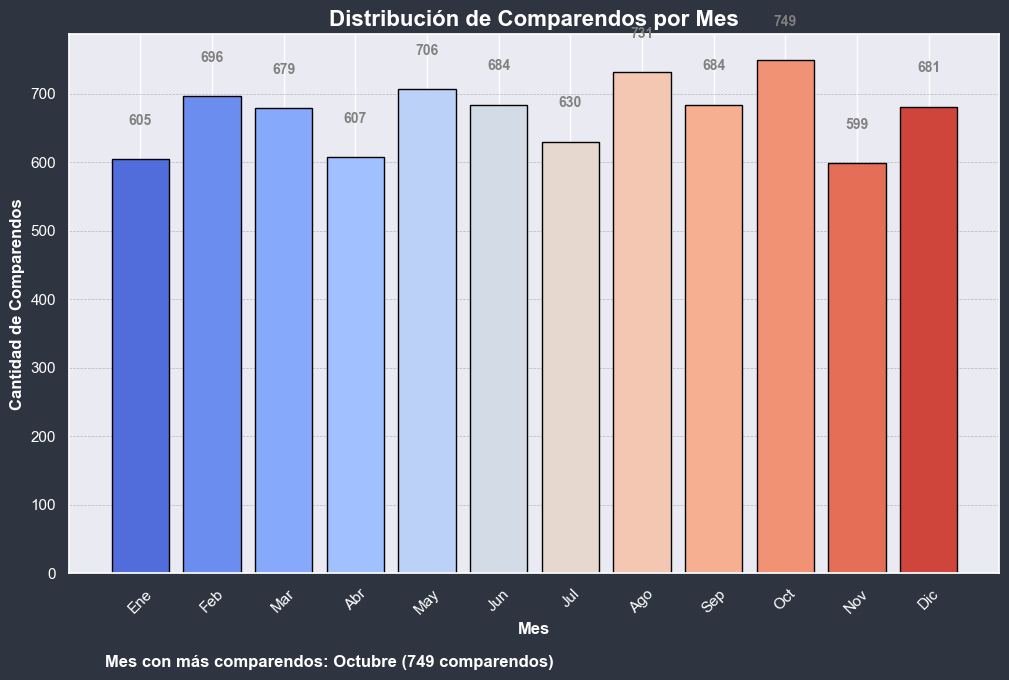

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv')

# Convertir la columna 'Fecha_Comparendo' a tipo datetime
data['Fecha_Comparendo'] = pd.to_datetime(data['Fecha_Comparendo'], errors='coerce')
data['Mes'] = data['Fecha_Comparendo'].dt.month

# Agrupar los datos por Mes
comparendos_por_mes = data['Mes'].value_counts().sort_index()

# Configuración del estilo
plt.figure(figsize=(12, 7), facecolor='#2E3440')
sns.set(style="darkgrid")

# Crear el gráfico de barras con un color moderno y profesional
bars = plt.bar(comparendos_por_mes.index, comparendos_por_mes, color=sns.color_palette("coolwarm", 12), edgecolor='black')

# Añadir etiquetas y título en color claro
plt.xlabel('Mes', fontsize=12, fontweight='bold', color='white')
plt.ylabel('Cantidad de Comparendos', fontsize=12, fontweight='bold', color='white')
plt.title('Distribución de Comparendos por Mes', fontsize=16, fontweight='bold', color='white')

# Añadir cuadrícula con estilo tenue
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Añadir etiquetas de valor en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval}', ha='center', color='gray', fontsize=10, fontweight='bold')

# Cambiar etiquetas de los ejes y su estilo
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45, color='white')
plt.yticks(color='white')

# Añadir conclusión en la esquina inferior
conclusion_text = f"Mes con más comparendos: Octubre ({comparendos_por_mes.max()} comparendos)"
plt.text(0.5, -130, conclusion_text, ha='left', va='center', fontsize=12, fontweight='bold', color='white')

plt.show()



In [37]:
from IPython.display import display
import pandas as pd

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv')

# Convertir la columna de fecha a formato de fecha y extraer el año
data['Fecha_Comparendo'] = pd.to_datetime(data['Fecha_Comparendo'], dayfirst=True, errors='coerce')
data['Año'] = data['Fecha_Comparendo'].dt.year

# Contar las ocurrencias de cada código de infracción por año
infraccion_counts = data.groupby(['Año', 'Codigo_Infraccion']).size().reset_index(name='Cantidad')

# Seleccionar las 5 infracciones más comunes por año
top_infracciones_por_año = infraccion_counts.groupby('Año').apply(lambda x: x.nlargest(5, 'Cantidad')).reset_index(drop=True)

# Mostrar la tabla de las infracciones más comunes por año
display(top_infracciones_por_año.head(5))


C:\Users\silvi\AppData\Local\Temp\ipykernel_24536\246975767.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_infracciones_por_año = infraccion_counts.groupby('Año').apply(lambda x: x.nlargest(5, 'Cantidad')).reset_index(drop=True)


,Año,Codigo_Infraccion,Cantidad
0,2015,C02: NO RESPETAR LAS SEÑALES LUMINOSAS,1362
1,2015,B01: NO RESPETAR LAS NORMAS DE PARQUEO,280
2,2015,C35: USAR CELULAR MIENTRAS CONDUCES,274
3,2015,C31: NO CEDER EL PASO A PEATONES,259
4,2015,D13: CONDUCIR SIN LICENCIA VIGENTE,238


C:\Users\silvi\AppData\Local\Temp\ipykernel_23344\410714580.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

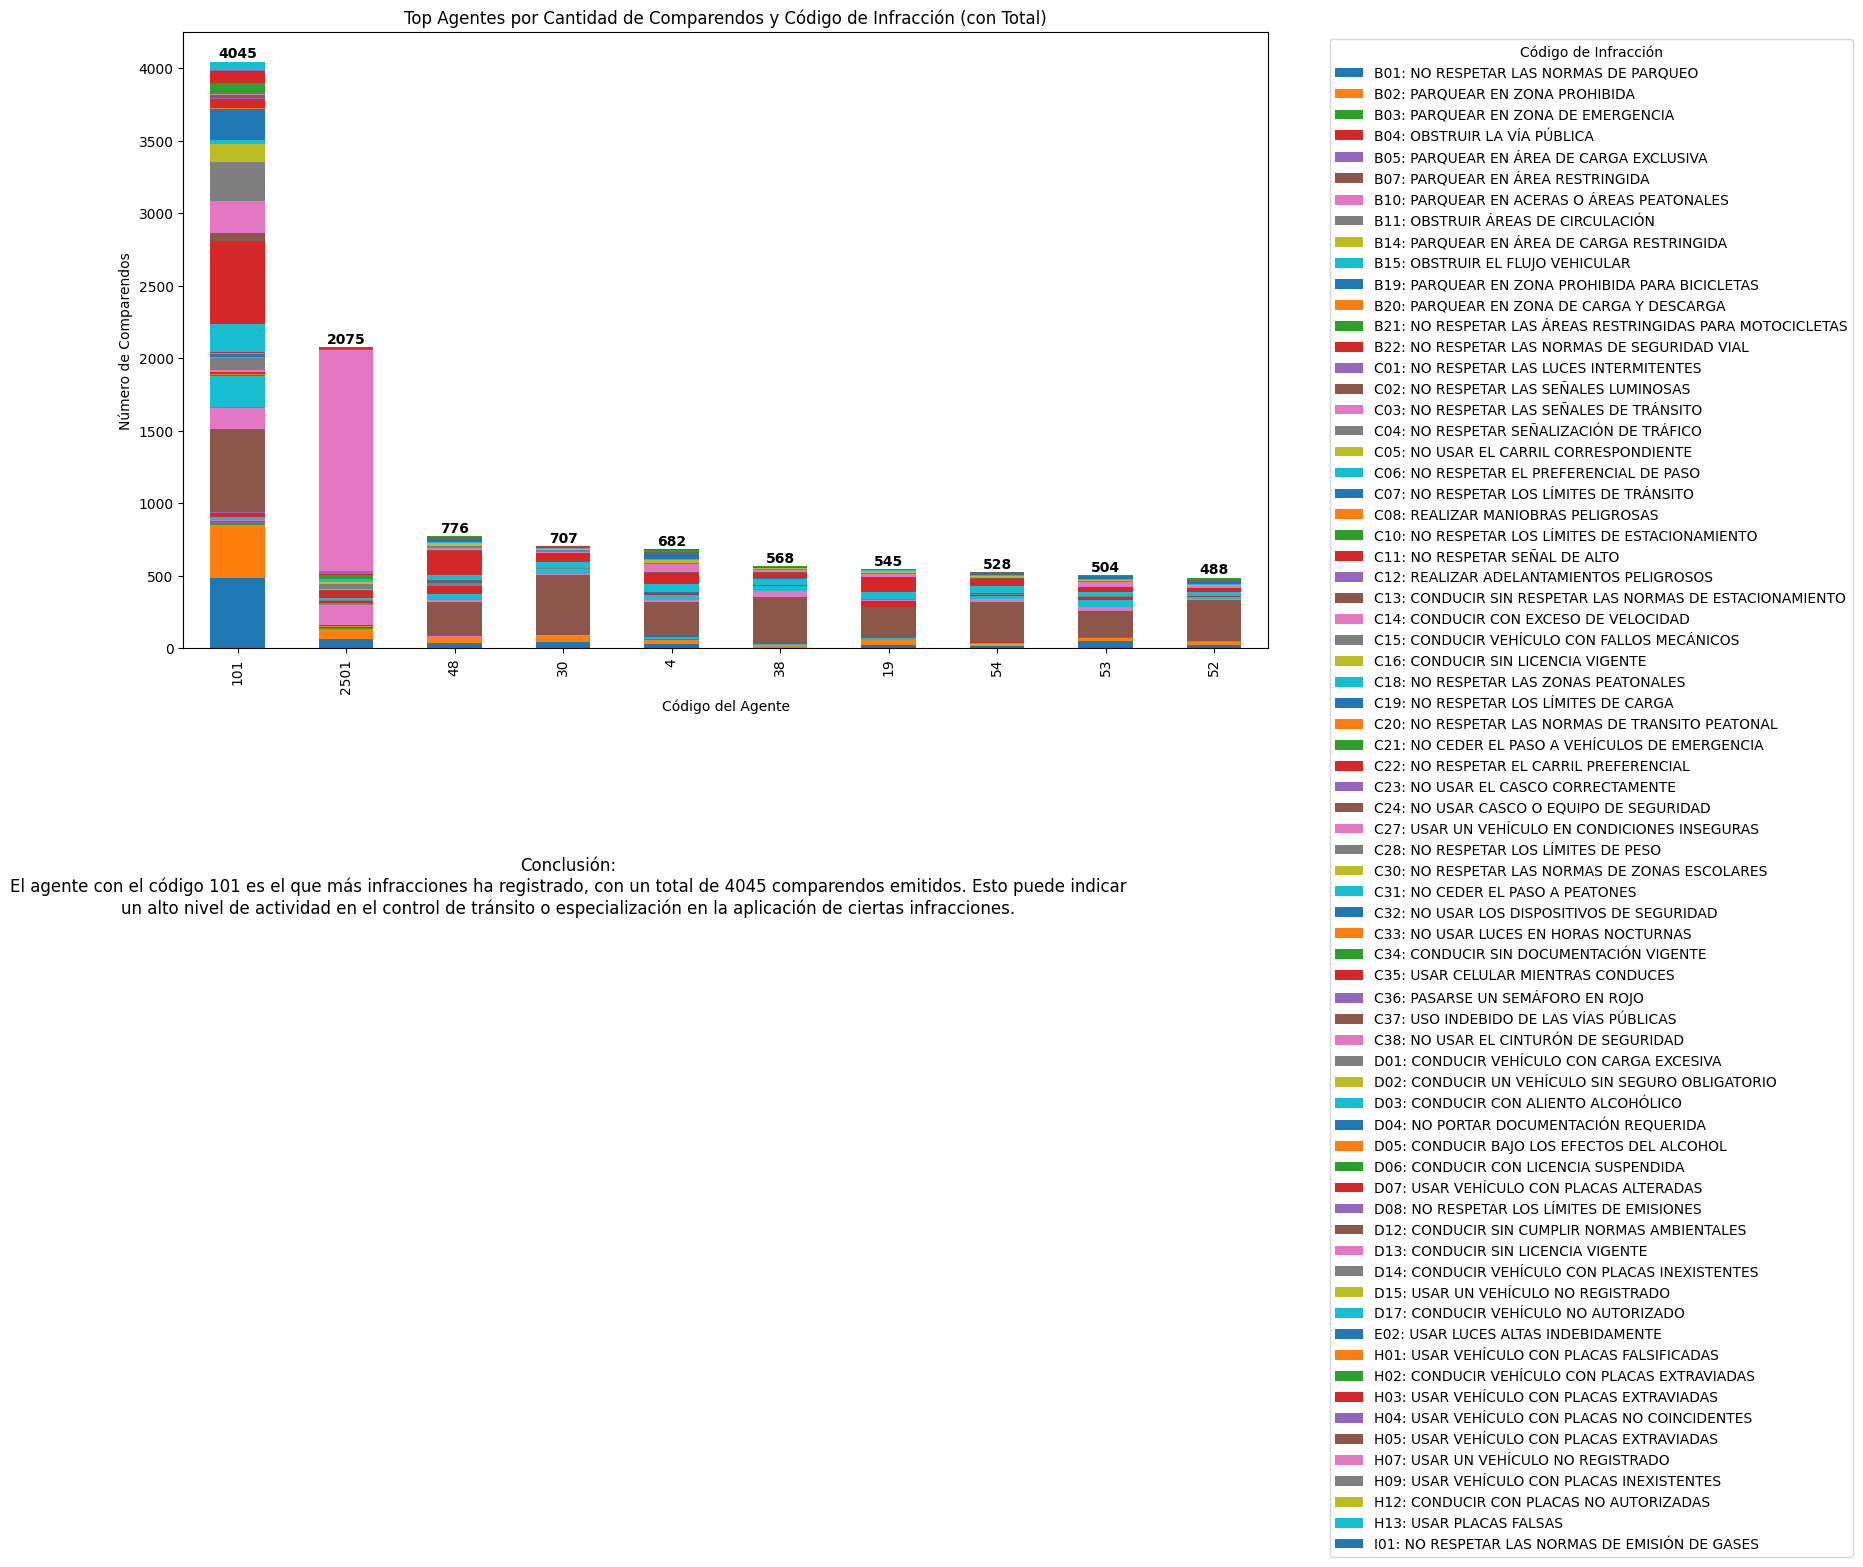

In [18]:
#5 Indicador 

import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv')


# Agrupar datos para contar el número de comparendos por cada agente y tipo de infracción
comparendos_por_agente_infraccion = data.groupby(['Codigo_Agente', 'Codigo_Infraccion']).size().unstack(fill_value=0)

# Sumamos el total de comparendos por agente
total_comparendos_por_agente = comparendos_por_agente_infraccion.sum(axis=1)

# Seleccionamos los agentes con más comparendos (top 10)
top_agentes = total_comparendos_por_agente.nlargest(10).index

# Filtramos la tabla original para sólo los agentes top seleccionados
comparendos_top_agentes = comparendos_por_agente_infraccion.loc[top_agentes]

# Identificar el agente con más comparendos en total
agente_top = total_comparendos_por_agente.idxmax()
total_top_agente = total_comparendos_por_agente.max()

# Generar la conclusión
conclusion = f"El agente con el código {agente_top} es el que más infracciones ha registrado, con un total de {total_top_agente} comparendos emitidos. " \
             "Esto puede indicar un alto nivel de actividad en el control de tránsito o especialización en la aplicación de ciertas infracciones."

# Configuración del gráfico
plt.figure(figsize=(14, 8))
ax = comparendos_top_agentes.plot(kind='bar', stacked=True, figsize=(14, 8))

# Añadir el total de comparendos por agente encima de cada barra
for idx, total in enumerate(total_comparendos_por_agente[top_agentes]):
    ax.text(idx, total + 5, str(total), ha='center', va='bottom', fontweight='bold', fontsize=10)

# Configuraciones de título y etiquetas
plt.title('Top Agentes por Cantidad de Comparendos y Código de Infracción (con Total)')
plt.xlabel('Código del Agente')
plt.ylabel('Número de Comparendos')
plt.legend(title='Código de Infracción', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir la conclusión en el gráfico con salto de línea y mejor posición
formatted_conclusion = "Conclusión:\n" + conclusion
plt.figtext(0.4, -0.15, formatted_conclusion, va='top', fontsize=12, wrap=True, ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\silvi\AppData\Local\Temp\ipykernel_23344\3733560784.py:8: SyntaxWarning: invalid escape sequence '\$'
  data['Precio_Comparendo'] = data['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)


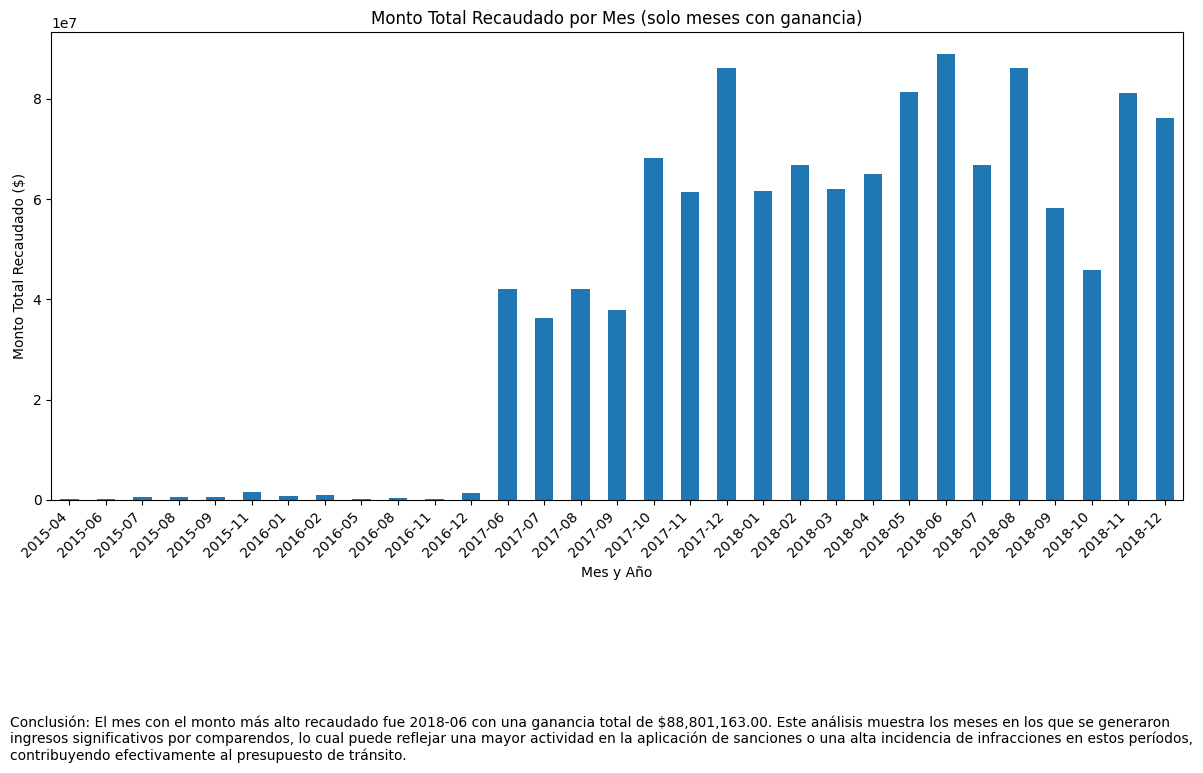

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv')

# Limpiar y convertir la columna Precio_Comparendo a un tipo numérico
data['Precio_Comparendo'] = data['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)

# Convertir la columna Fecha_Comparendo a tipo fecha para agrupar por mes
data['Fecha_Comparendo'] = pd.to_datetime(data['Fecha_Comparendo'], format='%d/%m/%Y')

# Crear una columna de mes y año para agrupar
data['Mes_Año'] = data['Fecha_Comparendo'].dt.to_period('M')

# Agrupar por mes y año, y calcular el total recaudado por cada mes
recaudo_mensual = data.groupby('Mes_Año')['Precio_Comparendo'].sum().sort_index()

# Filtrar solo los meses en los que se generó una ganancia (donde el monto recaudado es mayor que cero)
recaudo_mensual_con_ganancia = recaudo_mensual[recaudo_mensual > 0]

# Crear el gráfico de barras solo para los meses que generaron ganancia
plt.figure(figsize=(12, 6))
ax = recaudo_mensual_con_ganancia.plot(kind='bar')
plt.title('Monto Total Recaudado por Mes (solo meses con ganancia)')
plt.xlabel('Mes y Año')
plt.ylabel('Monto Total Recaudado ($)')
plt.xticks(rotation=45, ha='right')

# Generar una conclusión basada en el análisis de los datos
mes_top = recaudo_mensual_con_ganancia.idxmax()
monto_top = recaudo_mensual_con_ganancia.max()
conclusion_ganancia = f"Conclusión: El mes con el monto más alto recaudado fue {mes_top} con una ganancia total de ${monto_top:,.2f}. " \
                      "Este análisis muestra los meses en los que se generaron ingresos significativos por comparendos, " \
                      "lo cual puede reflejar una mayor actividad en la aplicación de sanciones o una alta incidencia de infracciones " \
                      "en estos períodos, contribuyendo efectivamente al presupuesto de tránsito."

# Agregar la conclusión en la parte inferior izquierda del gráfico con ajuste automático de líneas
plt.figtext(0.01, -0.2, conclusion_ganancia, ha='left', va='top', fontsize=10, wrap=True)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

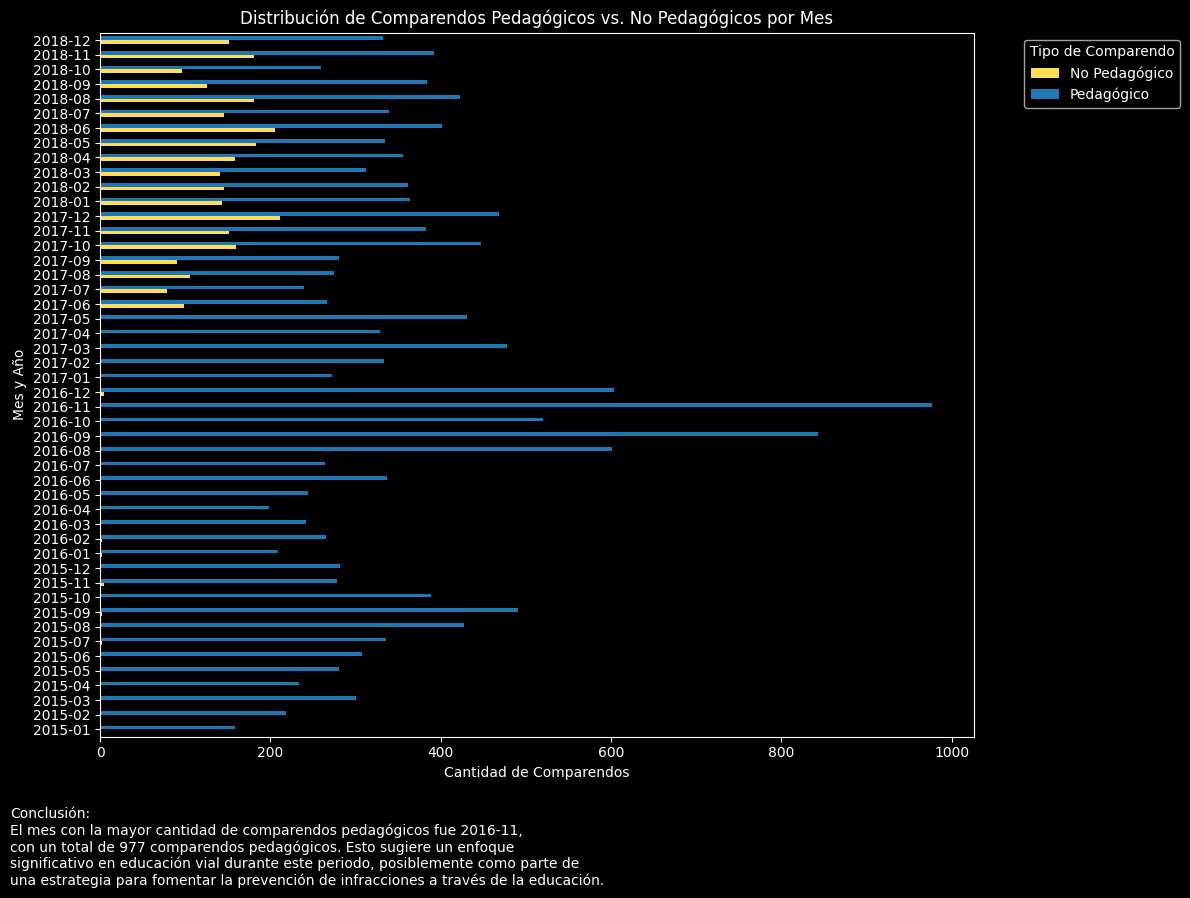

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Cambiar al estilo de fondo oscuro
mpl.style.use('dark_background')

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv')

# Crear columna para indicar si el comparendo es pedagógico o no
data['Es_Pedagogico'] = data['Comparendo_pedagogico'] == '✔'

# Convertir la columna Fecha_Comparendo a tipo fecha para agrupar por mes
data['Fecha_Comparendo'] = pd.to_datetime(data['Fecha_Comparendo'], format='%d/%m/%Y')

# Crear una columna de mes y año para agrupar
data['Mes_Año'] = data['Fecha_Comparendo'].dt.to_period('M')

# Agrupar por mes y si es pedagógico o no, y contar la cantidad de comparendos
comparendos_pedagogicos_mes = data.groupby(['Mes_Año', 'Es_Pedagogico']).size().unstack(fill_value=0)

# Identificar el mes con mayor cantidad de comparendos pedagógicos para la conclusión
mes_top_pedagogico = comparendos_pedagogicos_mes[True].idxmax()
total_pedagogico = comparendos_pedagogicos_mes[True].max()

# Redactar la conclusión con saltos de línea para adaptarse al cuadro
conclusion_pedagogico = (
    f"Conclusión:\nEl mes con la mayor cantidad de comparendos pedagógicos fue {mes_top_pedagogico},\n"
    f"con un total de {total_pedagogico} comparendos pedagógicos. Esto sugiere un enfoque\n"
    "significativo en educación vial durante este periodo, posiblemente como parte de\n"
    "una estrategia para fomentar la prevención de infracciones a través de la educación."
)

# Crear el gráfico de barras horizontales agrupadas con estilo oscuro
plt.figure(figsize=(12, 8))
ax = comparendos_pedagogicos_mes.plot(kind='barh', stacked=False, figsize=(12, 8), color=['#FFDD57', '#1F77B4'])
plt.title('Distribución de Comparendos Pedagógicos vs. No Pedagógicos por Mes')
plt.xlabel('Cantidad de Comparendos')
plt.ylabel('Mes y Año')
plt.legend(['No Pedagógico', 'Pedagógico'], title='Tipo de Comparendo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar la conclusión en la parte inferior izquierda del gráfico con ajuste automático de líneas
plt.figtext(0.01, -0.015, conclusion_pedagogico, ha='left', va='top', fontsize=10, wrap=True)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
C:\Users\silvi\AppData\Local\Temp\ipykernel_23344\1312888373.py:11: SyntaxWarning: invalid escape sequence '\$'
  data['Precio_Comparendo'] = data['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)


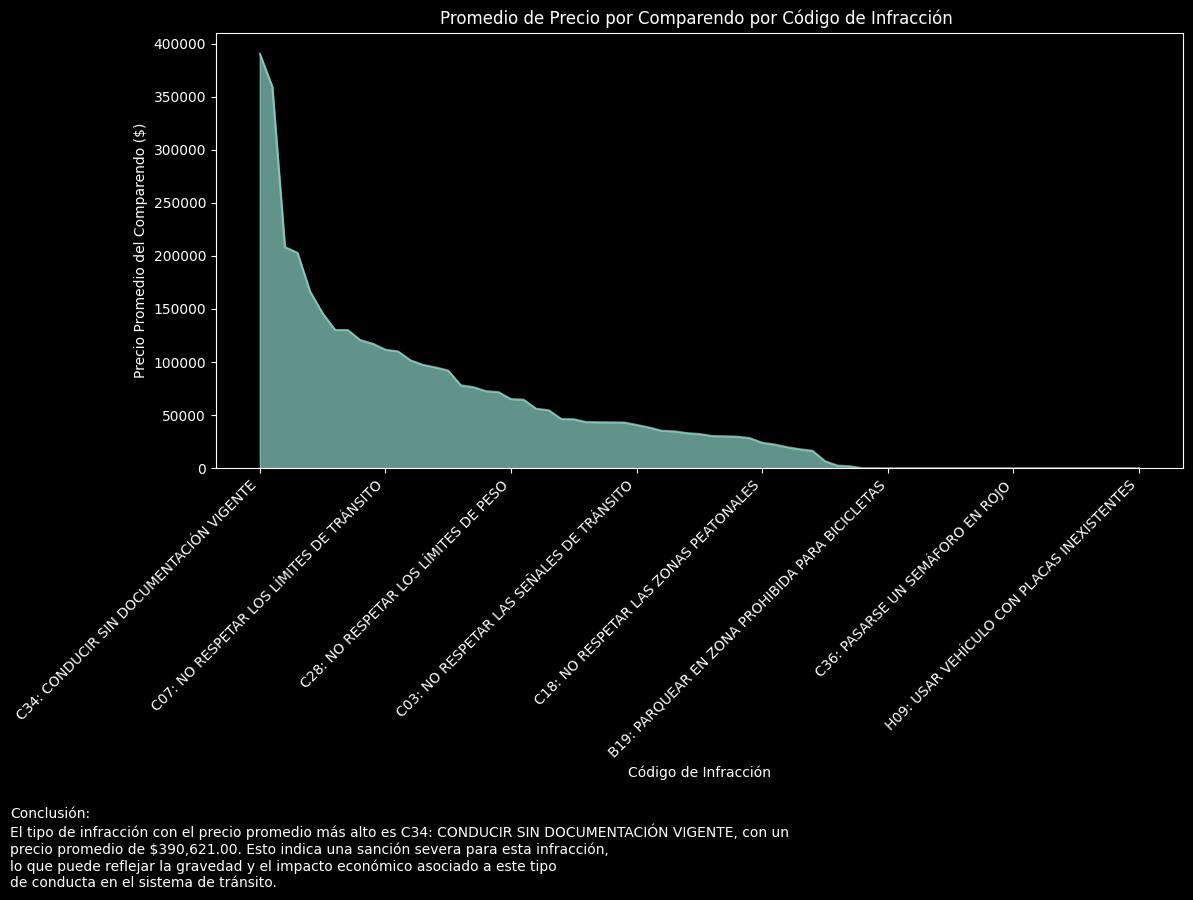

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Cambiar al estilo de fondo oscuro para mejor contraste en estilo cresta
mpl.style.use('dark_background')

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv')
# Asegurarse de que la columna Precio_Comparendo es numérica
data['Precio_Comparendo'] = data['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)

# Calcular el promedio del precio de los comparendos para cada código de infracción
precio_promedio_por_infraccion = data.groupby('Codigo_Infraccion')['Precio_Comparendo'].mean().sort_values(ascending=False)

# Redactar la conclusión basada en el análisis
infraccion_top = precio_promedio_por_infraccion.idxmax()
precio_top = precio_promedio_por_infraccion.max()
conclusion_precio_promedio = (
    f"Conclusión:\nEl tipo de infracción con el precio promedio más alto es {infraccion_top}, con un\n"
    f"precio promedio de ${precio_top:,.2f}. Esto indica una sanción severa para esta infracción,\n"
    "lo que puede reflejar la gravedad y el impacto económico asociado a este tipo\n"
    "de conducta en el sistema de tránsito."
)

# Crear el gráfico de área estilo cresta
plt.figure(figsize=(12, 8))
precio_promedio_por_infraccion.plot(kind='area', alpha=0.7)
plt.title('Promedio de Precio por Comparendo por Código de Infracción ')
plt.xlabel('Código de Infracción')
plt.ylabel('Precio Promedio del Comparendo ($)')
plt.xticks(rotation=45, ha='right')

# Agregar la conclusión en la parte inferior izquierda del gráfico
plt.figtext(0.01, -0.015, conclusion_precio_promedio, ha='left', va='top', fontsize=10, wrap=True)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


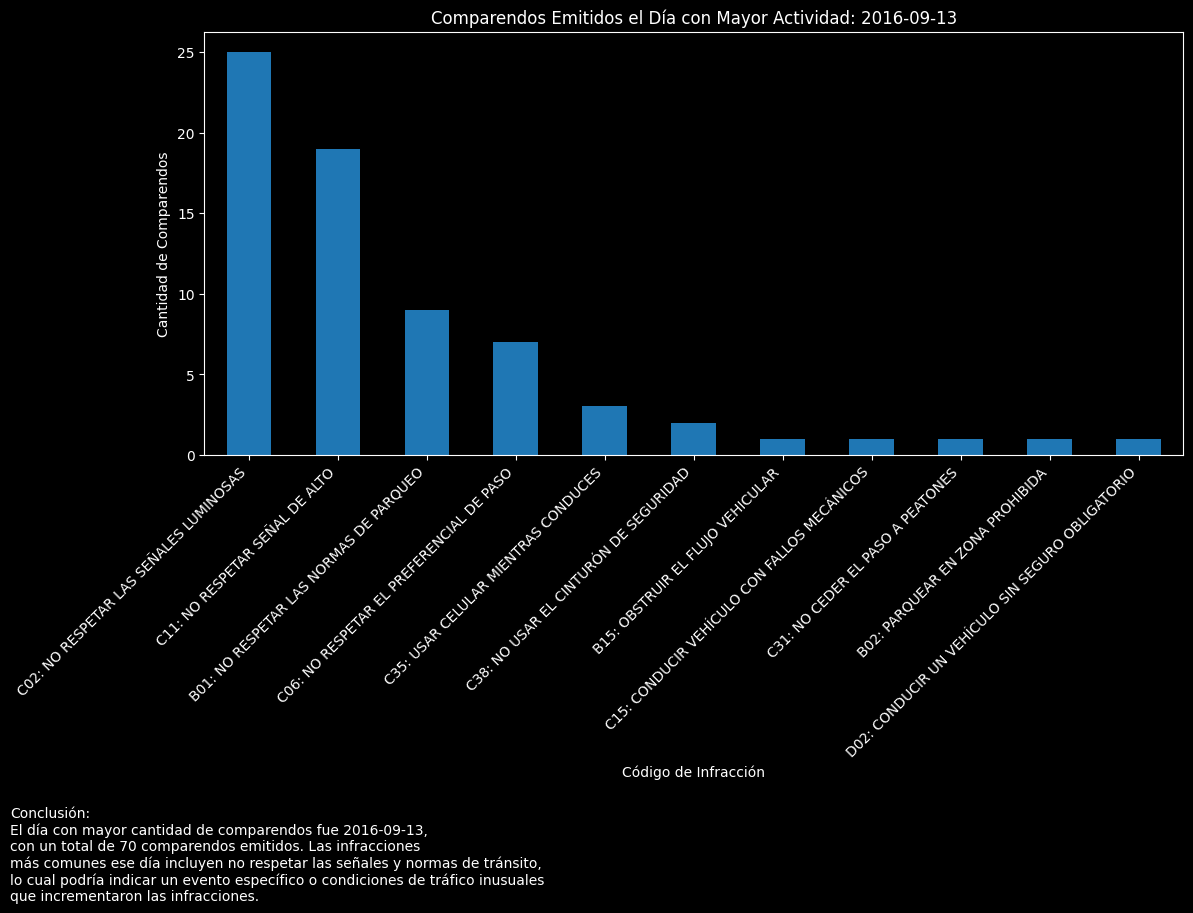

In [ ]:
# 10. Gráfico de barras con la cantidad de comparendos por código de infracción en el día con más actividad

import matplotlib as mpl

# Cambiar el estilo a fondo oscuro
mpl.style.use('dark_background')

# Convertir la columna Fecha_Comparendo a tipo fecha
data['Fecha_Comparendo'] = pd.to_datetime(data['Fecha_Comparendo'], format='%d/%m/%Y')

# Calcular el número total de comparendos por día
comparendos_por_dia = data.groupby('Fecha_Comparendo').size()

# Encontrar el día con el mayor número de comparendos
dia_maximo = comparendos_por_dia.idxmax()
total_comparendos_dia_maximo = comparendos_por_dia.max()

# Filtrar los datos para ese día específico
data_dia_maximo = data[data['Fecha_Comparendo'] == dia_maximo]

# Contar los comparendos por código de infracción para ese día
comparendos_por_infraccion = data_dia_maximo['Codigo_Infraccion'].value_counts()

# Redactar la conclusión
conclusion = (
    f"Conclusión:\nEl día con mayor cantidad de comparendos fue {dia_maximo.strftime('%Y-%m-%d')},\n"
    f"con un total de {total_comparendos_dia_maximo} comparendos emitidos. Las infracciones\n"
    "más comunes ese día incluyen no respetar las señales y normas de tránsito,\n"
    "lo cual podría indicar un evento específico o condiciones de tráfico inusuales\n"
    "que incrementaron las infracciones."
)

# Crear el gráfico en modo oscuro
plt.figure(figsize=(12, 8))
comparendos_por_infraccion.plot(kind='bar', color='#1f77b4')
plt.title(f'Comparendos Emitidos el Día con Mayor Actividad: {dia_maximo.strftime("%Y-%m-%d")}')
plt.xlabel('Código de Infracción')
plt.ylabel('Cantidad de Comparendos')
plt.xticks(rotation=45, ha='right')

# Agregar la conclusión en la parte inferior izquierda del gráfico
plt.figtext(0.01, -0.015, conclusion, ha='left', va='top', fontsize=10, wrap=True)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\silvi\AppData\Local\Temp\ipykernel_16864\570882017.py:10: SyntaxWarning: invalid escape sequence '\$'
  data['Precio_Comparendo'] = data['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)


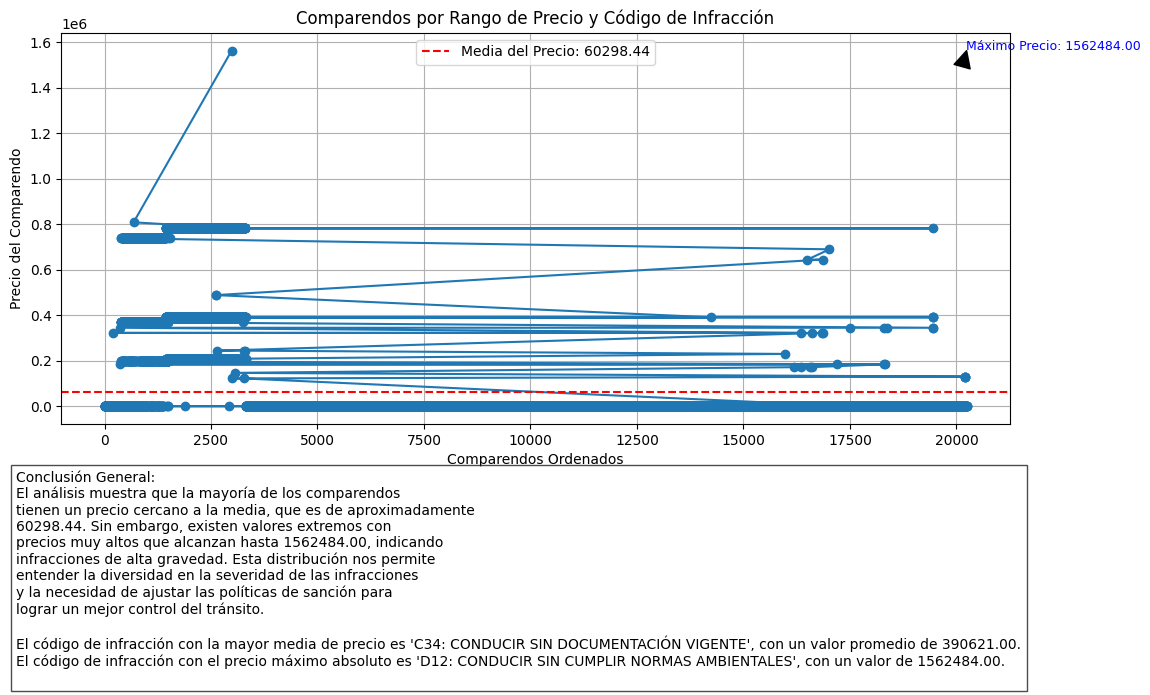

In [10]:
#11

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('Comparendo_Limpio.csv', na_values=['', ' ', 'NaN'])

# Limpiar y convertir la columna 'Precio_Comparendo' a valores numéricos
data['Precio_Comparendo'] = data['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)

# Remover valores nulos nuevamente después de la conversión
data = data.dropna(subset=['Precio_Comparendo'])

# Ordenar los datos de manera ascendente por el precio del comparendo
data_sorted = data.sort_values(by='Precio_Comparendo', ascending=True)

# Calcular la media y el valor máximo del precio agrupados por 'Codigo_Infraccion'
media_por_infraccion = data.groupby('Codigo_Infraccion')['Precio_Comparendo'].mean()
maximo_por_infraccion = data.groupby('Codigo_Infraccion')['Precio_Comparendo'].max()

# Encontrar el código de infracción con el valor máximo de precio promedio y el máximo de precio absoluto
codigo_max_media = media_por_infraccion.idxmax()
valor_max_media = media_por_infraccion.max()

codigo_max_absoluto = maximo_por_infraccion.idxmax()
valor_max_absoluto = maximo_por_infraccion.max()

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Precio_Comparendo'], linestyle='-', marker='o')
plt.xlabel('Comparendos Ordenados')
plt.ylabel('Precio del Comparendo')
plt.title('Comparendos por Rango de Precio y Código de Infracción')

# Agregar anotaciones para la media y el valor máximo
max_price = data_sorted['Precio_Comparendo'].max()
mean_price = data_sorted['Precio_Comparendo'].mean()

plt.axhline(y=mean_price, color='r', linestyle='--', label=f'Media del Precio: {mean_price:.2f}')
plt.annotate(f'Máximo Precio: {max_price:.2f}', xy=(len(data_sorted) - 1, max_price), xytext=(len(data_sorted) - 20, max_price + 500),
             arrowprops=dict(facecolor='black'), fontsize=9, color='blue')



# Generar un resumen para la conclusión con las medias y los máximos relevantes
conclusion_codigos = (f"El código de infracción con la mayor media de precio es '{codigo_max_media}', "
                      f"con un valor promedio de {valor_max_media:.2f}.\n"
                      f"El código de infracción con el precio máximo absoluto es '{codigo_max_absoluto}', "
                      f"con un valor de {valor_max_absoluto:.2f}.\n")

# Agregar conclusión en la parte inferior izquierda de la gráfica con mejor alineación
conclusion_text = ("Conclusión General:\n"
                   "El análisis muestra que la mayoría de los comparendos\n"
                   "tienen un precio cercano a la media, que es de aproximadamente\n"
                   f"{mean_price:.2f}. Sin embargo, existen valores extremos con\n"
                   f"precios muy altos que alcanzan hasta {max_price:.2f}, indicando\n"
                   "infracciones de alta gravedad. Esta distribución nos permite\n"
                   "entender la diversidad en la severidad de las infracciones\n"
                   "y la necesidad de ajustar las políticas de sanción para\n"
                   "lograr un mejor control del tránsito.\n\n"
                   + conclusion_codigos)

plt.text(0.05, -0.15, conclusion_text, fontsize=10, color='black', transform=plt.gcf().transFigure,
         verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))

plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()



<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\silvi\AppData\Local\Temp\ipykernel_13160\627629604.py:9: SyntaxWarning: invalid escape sequence '\$'
  comparendos_df['Precio_Comparendo'] = comparendos_df['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)


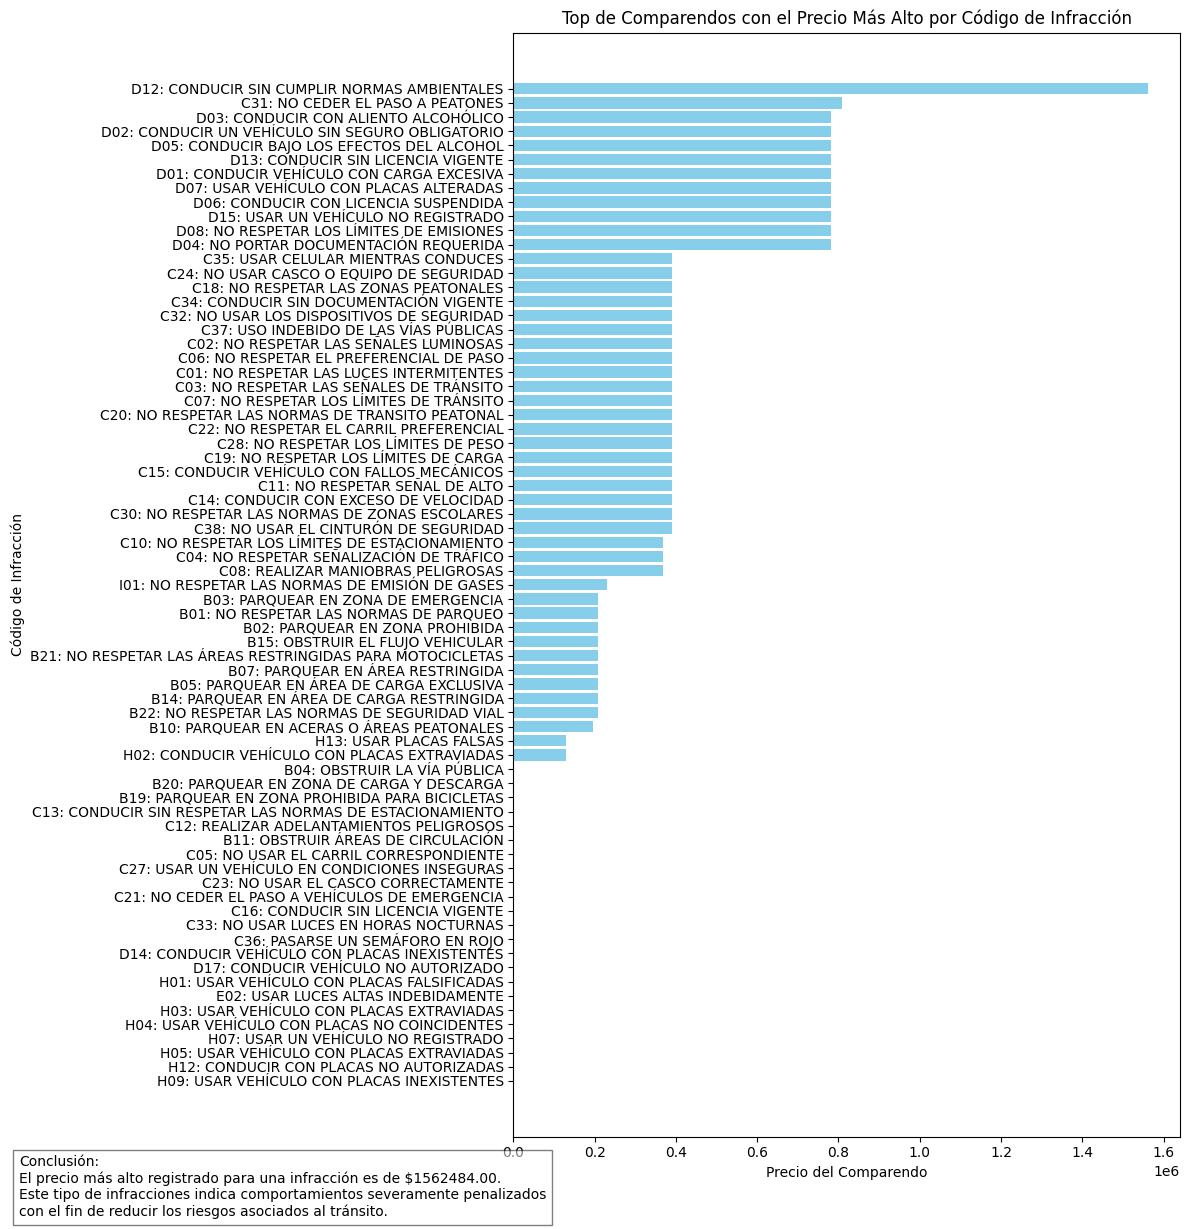

In [3]:
#13
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
comparendos_df = pd.read_csv('Comparendo_Limpio.csv')

# Limpiar la columna "Precio_Comparendo" para convertirla en numérica
comparendos_df['Precio_Comparendo'] = comparendos_df['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)

# Agrupar por Código de Infracción y encontrar el comparendo de precio máximo para cada código
comparendos_max_precio = comparendos_df.groupby('Codigo_Infraccion')['Precio_Comparendo'].max().reset_index()

# Ordenar los datos por Precio_Comparendo descendente para tener un "Top" de infracciones con mayor precio
top_comparendos = comparendos_max_precio.sort_values(by='Precio_Comparendo', ascending=False)

# Crear una gráfica de barras horizontales agrupadas para representar los comparendos con precios más altos por código de infracción
plt.figure(figsize=(12, 12))
plt.barh(top_comparendos['Codigo_Infraccion'], top_comparendos['Precio_Comparendo'], color='skyblue')
plt.xlabel('Precio del Comparendo')
plt.ylabel('Código de Infracción')
plt.title('Top de Comparendos con el Precio Más Alto por Código de Infracción')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la infracción más costosa en la parte superior

# Agregar conclusión en la esquina inferior izquierda
conclusion = (
    "Conclusión:\n"
    "El precio más alto registrado para una infracción es de ${:.2f}.\n"
    "Este tipo de infracciones indica comportamientos severamente penalizados\n"
    "con el fin de reducir los riesgos asociados al tránsito."
).format(top_comparendos['Precio_Comparendo'].max())

plt.figtext(0.02, -0.02, conclusion, fontsize=10, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


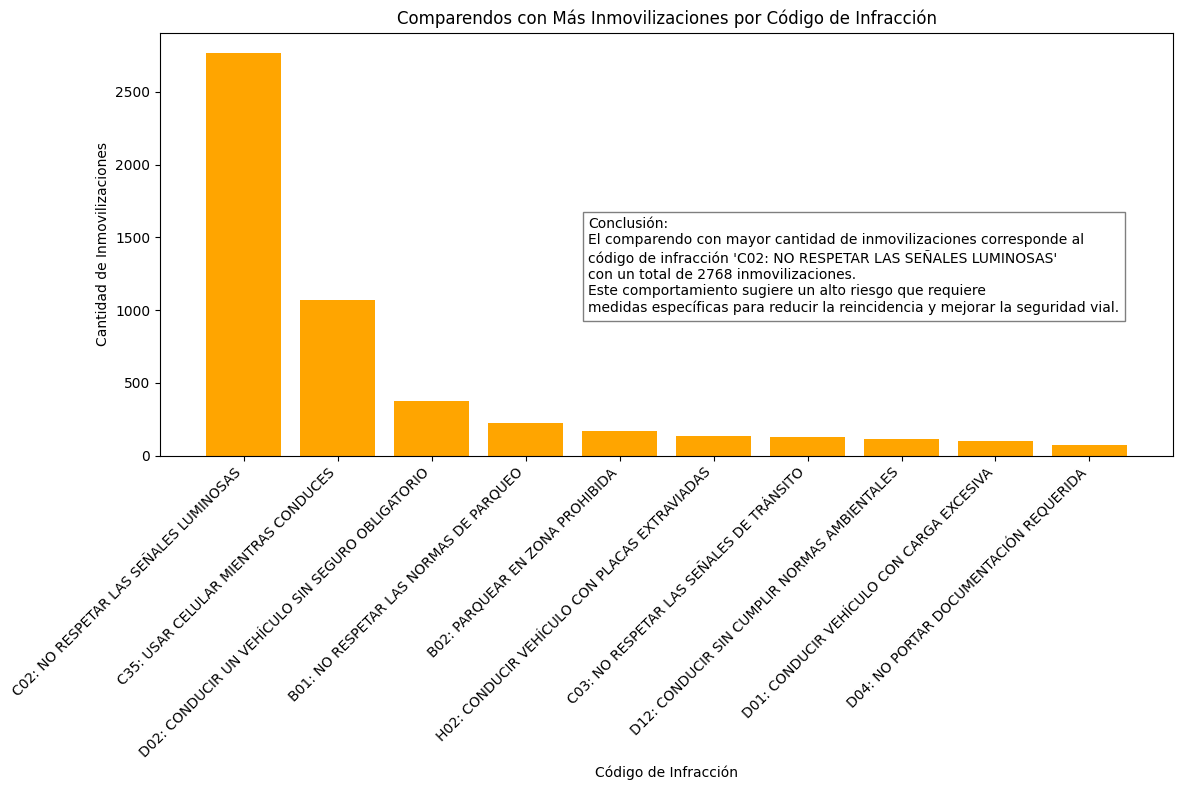

In [18]:
#14
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
comparendos_df = pd.read_csv('Comparendo_Limpio.csv')

# Filtrar los comparendos con inmovilización usando el valor correcto ("Si")
comparendos_inmovilizados = comparendos_df[comparendos_df['Inmovilizacion'] == 'Si']

# Agrupar por Código de Infracción y contar la cantidad de inmovilizaciones
comparendos_inmovilizados_count = comparendos_inmovilizados['Codigo_Infraccion'].value_counts().reset_index()
comparendos_inmovilizados_count.columns = ['Codigo_Infraccion', 'Cantidad_Inmovilizaciones']

# Tomar los códigos de infracción con mayor cantidad de inmovilizaciones
top_inmovilizaciones = comparendos_inmovilizados_count.head(10)

# Obtener el comparendo con mayor cantidad de inmovilizaciones
comparendo_max_inmovilizacion = top_inmovilizaciones.iloc[0]

# Crear una gráfica de barras verticales para representar los comparendos con inmovilización más frecuentes por código de infracción
plt.figure(figsize=(12, 8))
plt.bar(top_inmovilizaciones['Codigo_Infraccion'], top_inmovilizaciones['Cantidad_Inmovilizaciones'], color='orange')
plt.xlabel('Código de Infracción')
plt.ylabel('Cantidad de Inmovilizaciones')
plt.title('Comparendos con Más Inmovilizaciones por Código de Infracción')
plt.xticks(rotation=45, ha='right')

# Agregar conclusión en la esquina inferior izquierda con información del comparendo con mayor inmovilización
conclusion = (
    "Conclusión:\n"
    f"El comparendo con mayor cantidad de inmovilizaciones corresponde al\n"
    f"código de infracción '{comparendo_max_inmovilizacion['Codigo_Infraccion']}'\n"
    f"con un total de {comparendo_max_inmovilizacion['Cantidad_Inmovilizaciones']} inmovilizaciones.\n"
    "Este comportamiento sugiere un alto riesgo que requiere\n"
    "medidas específicas para reducir la reincidencia y mejorar la seguridad vial."
)
plt.figtext(0.5, 0.6, conclusion, fontsize=10, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()



<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\silvi\AppData\Local\Temp\ipykernel_13160\1730875929.py:6: SyntaxWarning: invalid escape sequence '\$'
  comparendos_df['Precio_Comparendo'] = comparendos_df['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\silvi\AppData\Local\Temp\ipykernel_13160\1730875929.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


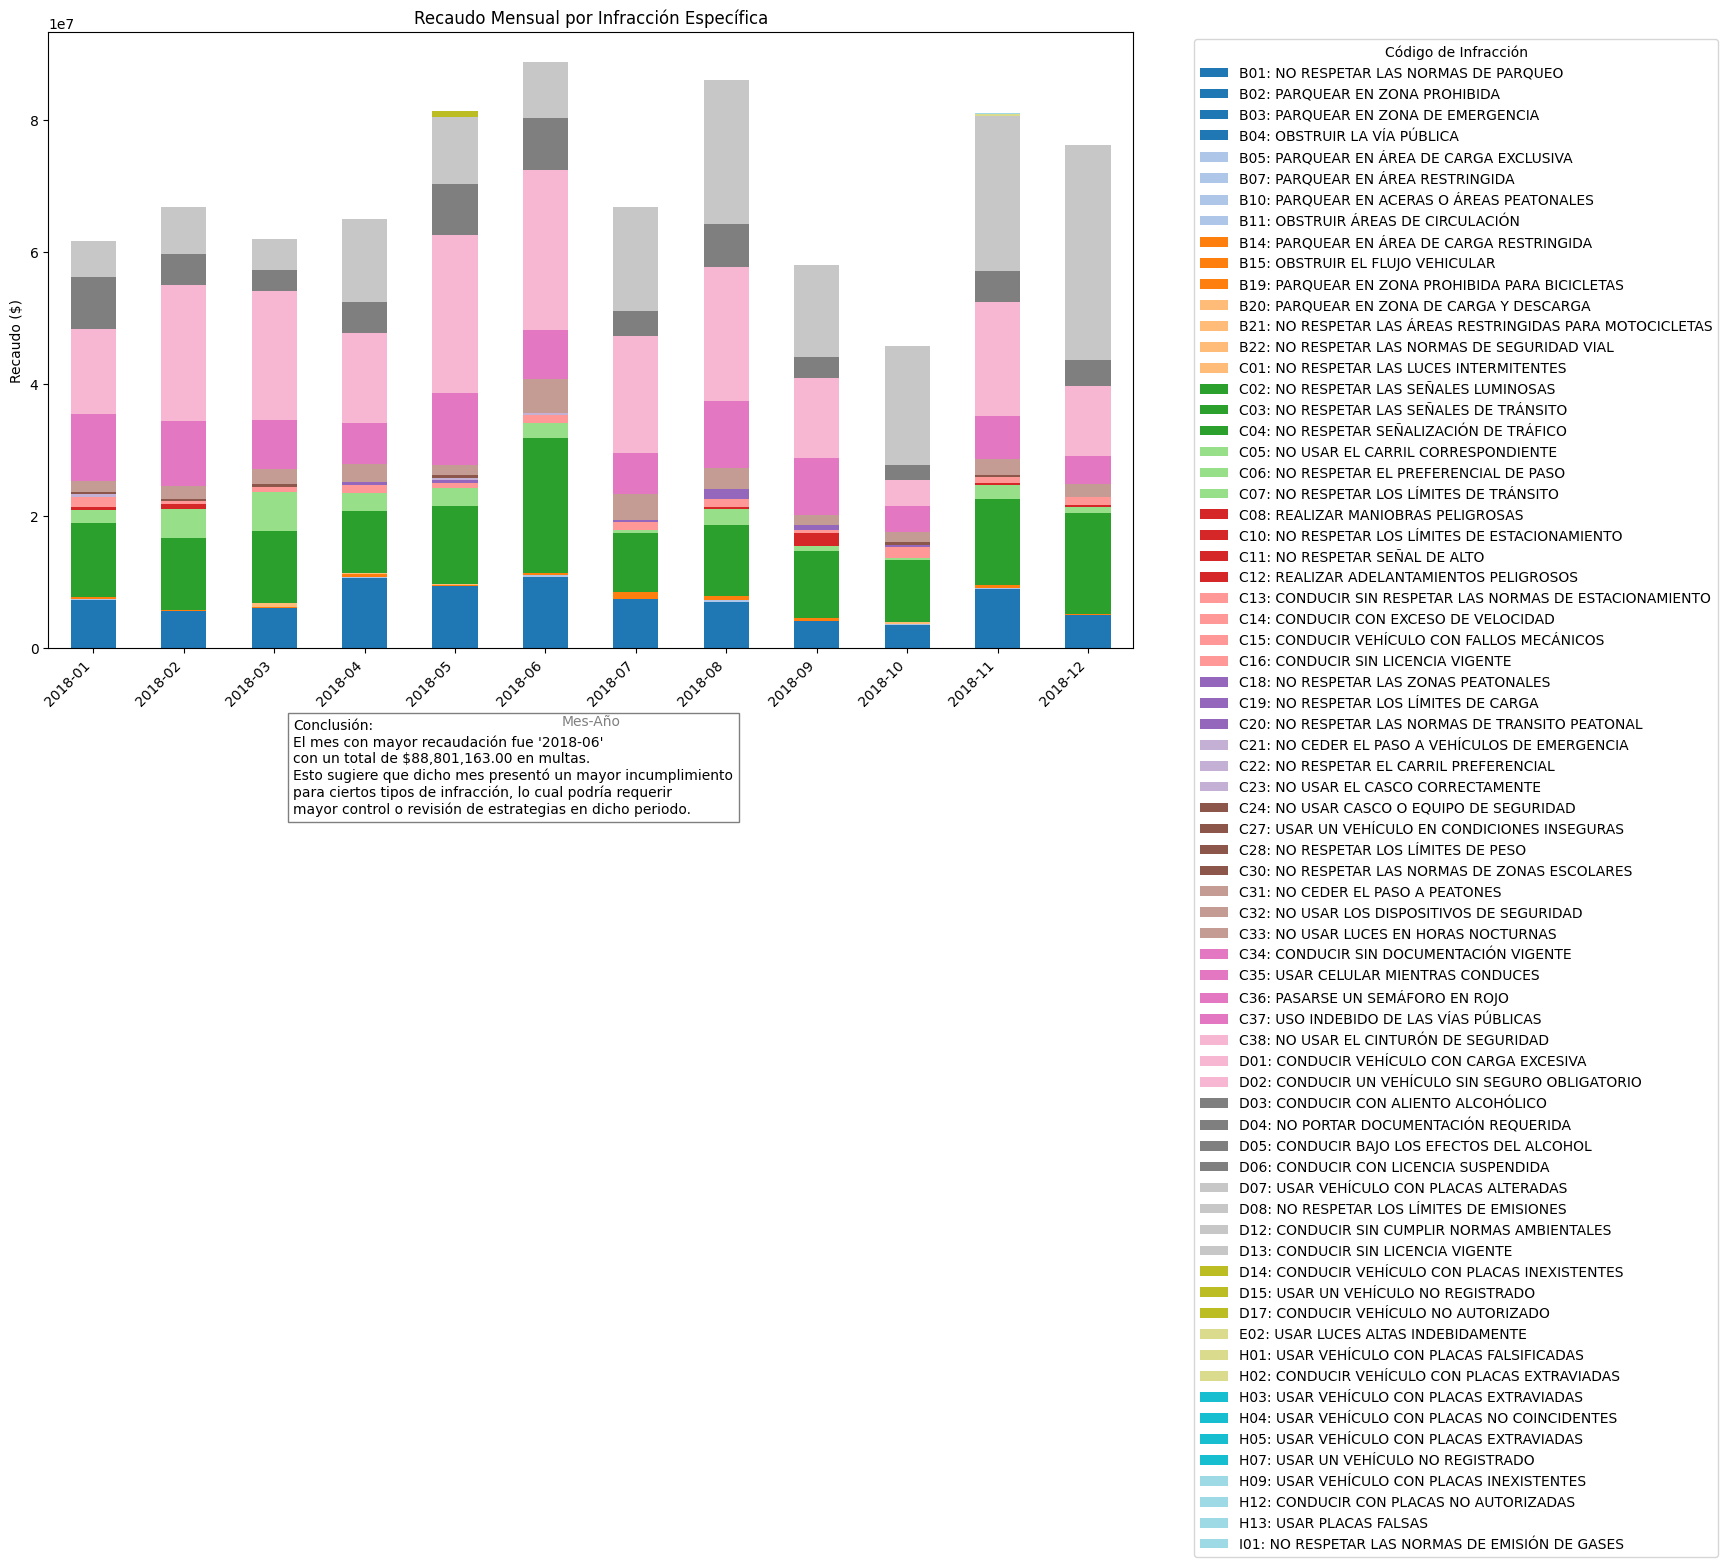

In [25]:


# Convertir la columna "Fecha_Comparendo" al formato de fecha para extraer mes y año
comparendos_df['Fecha_Comparendo'] = pd.to_datetime(comparendos_df['Fecha_Comparendo'], format='%d/%m/%Y')
comparendos_df['Mes_Año'] = comparendos_df['Fecha_Comparendo'].dt.to_period('M')

# Agrupar por Mes-Año y Código de Infracción, y sumar el valor de Precio_Comparendo
comparendos_df['Precio_Comparendo'] = comparendos_df['Precio_Comparendo'].replace('[\$,]', '', regex=True).astype(float)
recaudo_mensual = comparendos_df.groupby(['Mes_Año', 'Codigo_Infraccion'])['Precio_Comparendo'].sum().reset_index()

# Crear una tabla pivote para tener los códigos de infracción como columnas y los meses como filas
pivot_recaudo = recaudo_mensual.pivot(index='Mes_Año', columns='Codigo_Infraccion', values='Precio_Comparendo').fillna(0)

# Seleccionar solo los 12 meses más recientes para simplificar la visualización
pivot_recaudo = pivot_recaudo.tail(12)

# Crear una gráfica de barras apiladas verticalmente para representar el recaudo mensual por infracción específica
ax = pivot_recaudo.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="tab20")

plt.xlabel('Mes-Año')
plt.ylabel('Recaudo ($)')
plt.title('Recaudo Mensual por Infracción Específica')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Código de Infracción', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar conclusión en la esquina inferior izquierda
max_recaudo_total = pivot_recaudo.sum(axis=1).max()
mes_max_recaudo = pivot_recaudo.sum(axis=1).idxmax()
conclusion = (
    "Conclusión:\n"
    f"El mes con mayor recaudación fue '{mes_max_recaudo}'\n"
    f"con un total de ${max_recaudo_total:,.2f} en multas.\n"
    "Esto sugiere que dicho mes presentó un mayor incumplimiento\n"
    "para ciertos tipos de infracción, lo cual podría requerir\n"
    "mayor control o revisión de estrategias en dicho periodo."
)
plt.figtext(0.3, -0.1, conclusion, fontsize=10, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()
